In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_read_path = '/home/abishekthamma/PycharmProjects/masters_thesis/ss-llm/nanoGPT/results/rundata.xlsx'
run_details_df = pd.read_excel(data_read_path, sheet_name='Run Details')
loss_df = pd.read_excel(data_read_path, sheet_name='Loss')


In [3]:
#To add capabilities for stripplot with connected lines, add this block of code

UTILS_PATH = '/home/abishekthamma/PycharmProjects/masters_thesis/ss-llm/nanoGPT/utils'
UTILS_PLOT_FILE = 'scatter_stats_utils.py'

import sys
sys.path.append(UTILS_PATH)

from scatter_stats_utils import connect_dots


In [4]:

#Filter for data where n_layer = 6, n_head = 6, mask_type = 'exponential_new' or 'Non' and seeds are 42, 2347, 616, 466, 1337
run_details_df[(run_details_df['n_layer'] == 6) & (run_details_df['n_head'] == 6) & ((run_details_df['mask_type'] == 'exponential_new') | (run_details_df['mask_type'] == 'Non')) & (run_details_df['seed'].isin([42, 2347, 616, 466, 1337]) & (run_details_df['dataset'] == 'babylm_full_bpe_8k') & (run_details_df['curriculum_learning'] == False))].groupby(['mask_type', 'mask_decay_rate', "echoic_memory"]).agg({
    'seed': lambda x: list(x),
    'run_id': lambda x: list(x)
}) #[['seed', 'run_id']].apply(list)



seed  \
mask_type       mask_decay_rate echoic_memory                                     
Non             0.0             1              [1337, 42, 2347, 616, 466, 1337]   
exponential_new 0.5             1                    [1337, 42, 2347, 616, 466]   
                                5                    [1337, 42, 616, 466, 2347]   
                                10                   [1337, 42, 2347, 616, 466]   
                1.0             1                    [1337, 42, 2347, 616, 466]   
                                5                    [1337, 42, 2347, 616, 466]   
                                10                   [1337, 42, 2347, 616, 466]   
                2.0             1                    [1337, 42, 2347, 616, 466]   
                                5                    [1337, 42, 2347, 616, 466]   
                                10                   [1337, 42, 2347, 616, 466]   
                3.0             1                    [1337, 42, 2347, 616, 466]   
                                5                    [1337, 42, 2347, 616, 466]   
                                10                   [1337, 42, 2347, 616, 466]   
                4.0             1                    [1337, 42, 2347, 616, 466]   
                                5                    [1337, 42, 2347, 616, 466]   
                                10                   [1337, 42, 2347, 616, 466]   
                2000.0          1                    [1337, 42, 2347, 616, 466]   
                                5                    [1337, 42, 2347, 616, 466]   
                                10                   [1337, 42, 2347, 616, 466]   

                                                                                          run_id  
mask_type       mask_decay_rate echoic_memory                                                     
Non             0.0             1              [5496427, 6892212, 6892213, 6892216, 6892220, ...  
exponential_new 0.5             1                  [6810321, 7678419, 7678420, 7678421, 7678422]  
                                5                  [6681945, 7678423, 7678425, 7678426, 7679909]  
                                10                 [6681946, 7678427, 7678428, 7678429, 7678430]  
                1.0             1                  [6810203, 7678383, 7678384, 7678385, 7678386]  
                                5                  [6681922, 7678387, 7678388, 7678389, 7678390]  
                                10                 [6681939, 7678391, 7678392, 7678393, 7678394]  
                2.0             1                  [6810296, 6839399, 6839404, 6839409, 6839413]  
                                5                  [6681942, 6839402, 6839416, 6839418, 6839422]  
                                10                 [6681944, 6839403, 6839424, 6839426, 6839430]  
                3.0             1                  [6810297, 7678395, 7678396, 7678397, 7678398]  
                                5                  [6683308, 7678399, 7678400, 7678401, 7678402]  
                                10                 [6683309, 7678403, 7678404, 7678405, 7678406]  
                4.0             1                  [6810325, 7678407, 7678408, 7678409, 7678410]  
                                5                  [6683310, 7678411, 7678412, 7678413, 7678414]  
                                10                 [6683311, 7678415, 7678416, 7678417, 7678418]  
                2000.0          1                  [6849723, 6890225, 6890230, 6890232, 6890236]  
                                5                  [6849725, 6890228, 6890238, 6890240, 6890244]  
                                10                 [6864685, 6890229, 6890246, 6890249, 6890254]

In [5]:
plot_df = run_details_df[(run_details_df['n_layer'] == 6) & (run_details_df['n_head'] == 6) & ((run_details_df['mask_type'] == 'exponential_new') | (run_details_df['mask_type'] == 'Non')) & (run_details_df['seed'].isin([42, 2347, 616, 466, 1337]) & (run_details_df['dataset'] == 'babylm_full_bpe_8k') & (run_details_df['curriculum_learning'] == False)) & (run_details_df['mask_decay_rate'] != 2000) & (run_details_df["run_id"] != 5496427)].merge(loss_df, on='run_id')[['mask_type', 'mask_decay_rate', 'echoic_memory', 'val_loss', 'seed']]

#Rename Non to No Mask and exponential_new to PL_Decay  
plot_df["mask_type"] = plot_df["mask_type"].apply(lambda x: "No_Mask" if x == "Non" else "PL_Decay")

plot_df["x_condition"] = plot_df["mask_type"] + "_" + plot_df["mask_decay_rate"].astype(str)
plot_df["echoic_memory_flag"] = plot_df["echoic_memory"].apply(lambda x: False if x == 1 else True)

plot_df.sort_values(by=['x_condition', 'echoic_memory', 'seed'], inplace=True)


In [6]:
plot_df

,mask_type,mask_decay_rate,echoic_memory,val_loss,seed,x_condition,echoic_memory_flag
27,No_Mask,0.0,1,3.851849,42,No_Mask_0.0,False
30,No_Mask,0.0,1,3.857377,466,No_Mask_0.0,False
29,No_Mask,0.0,1,3.837300,616,No_Mask_0.0,False
31,No_Mask,0.0,1,3.845519,1337,No_Mask_0.0,False
28,No_Mask,0.0,1,3.843445,2347,No_Mask_0.0,False
...,...,...,...,...,...,...,...
64,PL_Decay,4.0,10,3.843827,42,PL_Decay_4.0,True
67,PL_Decay,4.0,10,3.834516,466,PL_Decay_4.0,True
66,PL_Decay,4.0,10,3.843615,616,PL_Decay_4.0,True
9,PL_Decay,4.0,10,3.839895,1337,PL_Decay_4.0,True


/tmp/ipykernel_96158/284294481.py:19: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=plot_df, x='mask_decay_rate', y='val_loss', hue='echoic_memory', ax=ax, dodge=True, alpha=0.5, color='black')


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 5 and the array at index 1 has size 0

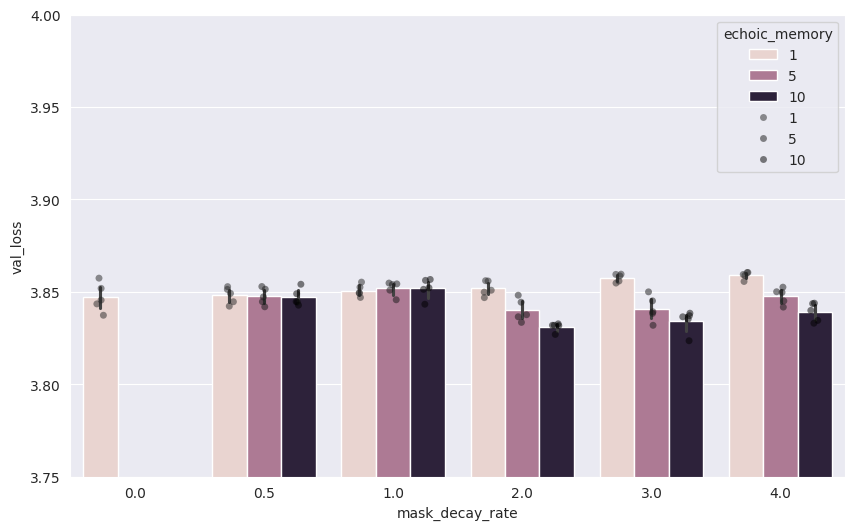

In [7]:
import numpy as np

def connect_dots_ib(ax_obj, alpha=.4, col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs = ax_obj.collections
    xcoords = np.vstack([this_cs.get_offsets()[:, 0] for this_cs in cs]).T
    ycoords = np.vstack([this_cs.get_offsets()[:, 1] for this_cs in cs]).T
    for (xcoord, ycoord) in zip(xcoords, ycoords):
        xcoord = [xcoord[0::2], xcoord[1::2]]
        ycoord = [ycoord[0::2], ycoord[1::2]]
        ax_obj.plot(xcoord, ycoord, alpha=alpha, color=col, linewidth=linewidth)

    return (ax_obj)


fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=plot_df, x='mask_decay_rate', y='val_loss', hue='echoic_memory', ax=ax)
sns.stripplot(data=plot_df, x='mask_decay_rate', y='val_loss', hue='echoic_memory', ax=ax, dodge=True, alpha=0.5, color='black')
ax.set_ylim(3.75, 4)
ax.axhline(plot_df[plot_df['mask_type'] == 'Non']['val_loss'].mean(), color='black', linestyle='--', linewidth=0.5)

connect_dots(ax)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=6)

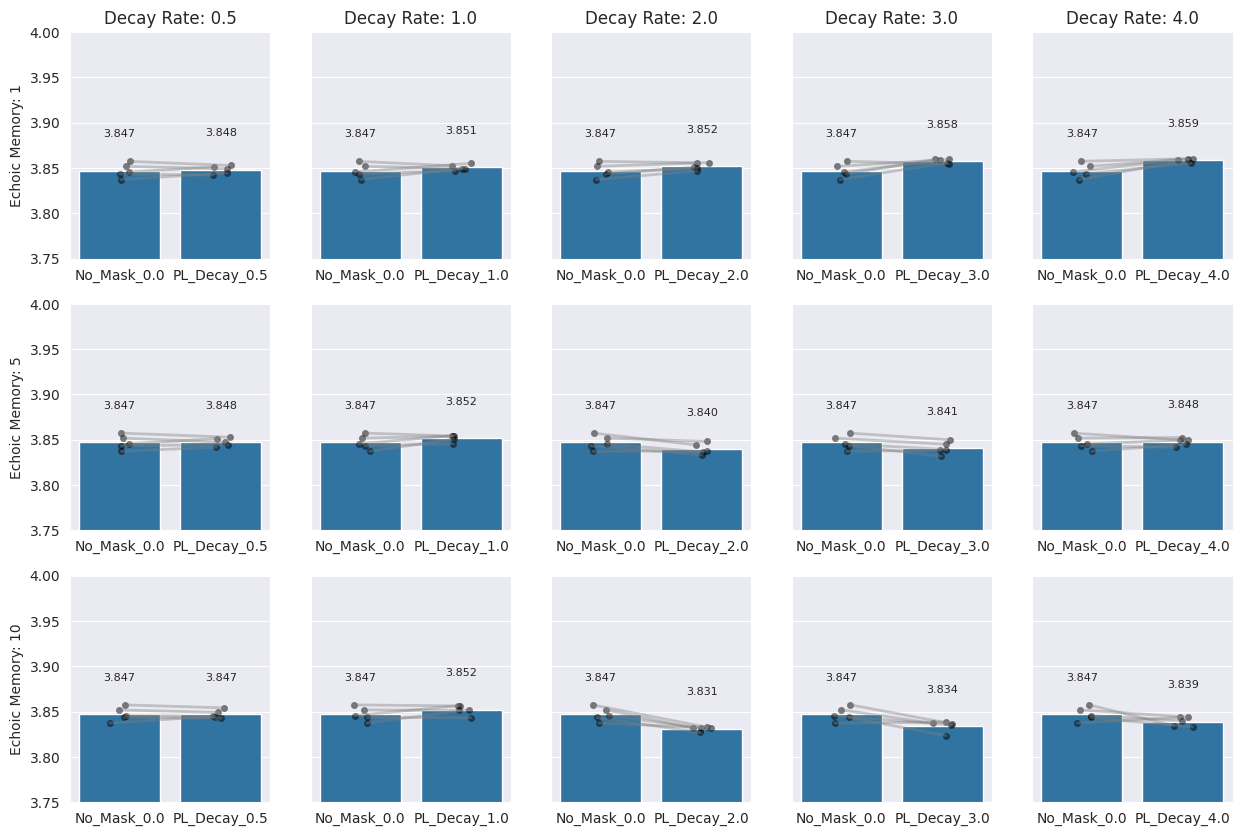

In [8]:
#Create a 5x3 grid of pairwise barplots comparing no_mask with masked  , with each row representing a different echoic memory value from 1, 5, 10 and each column representing a different x_condition value 0.5, 1, 2, 3, 4

fig, axs = plt.subplots(3, 5, figsize=(15, 10))

for i, em in enumerate(plot_df['echoic_memory'].unique()):
    for j, x_cond in enumerate(plot_df[plot_df['x_condition'] != 'No_Mask_0.0']['x_condition'].unique()):
        sns.barplot(data=(plot_df[(plot_df['echoic_memory'] == em) & (plot_df['x_condition'] == x_cond) | (plot_df['echoic_memory'] == 1) & (plot_df['x_condition'] == 'No_Mask_0.0')]), x='x_condition', y='val_loss', ax=axs[i, j], errorbar=None)
        sns.stripplot(
            data=(plot_df[(plot_df['echoic_memory'] == em) & (plot_df['x_condition'] == x_cond) | (plot_df['echoic_memory'] == 1) & (plot_df['x_condition'] == 'No_Mask_0.0')]),
            x='x_condition', y='val_loss', ax=axs[i, j], dodge=True, alpha=0.5, color='black', zorder=1
        )
        if i == 0:
            axs[i, j].set_title(f"Decay Rate: {x_cond.split('_')[2]}")
        axs[i, j].set_ylim(3.75, 4)
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('')
        connect_dots(axs[i, j])
        
        if j != 0:
            axs[i, j].set_yticklabels([])
        else:
            axs[i, j].set_ylabel(f"Echoic Memory: {em}")
        
        for p in axs[i, j].patches:
            axs[i, j].annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()+0.025), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    

In [9]:
plot_df.groupby(["x_condition", "echoic_memory_flag"]).agg({"val_loss": "mean"}).reset_index().pivot(index='x_condition', columns='echoic_memory_flag', values='val_loss').reset_index()

echoic_memory_flag,x_condition,False,True
0,No_Mask_0.0,3.847098,NaN
1,PL_Decay_0.5,3.848008,3.847286
2,PL_Decay_1.0,3.850665,3.851901
3,PL_Decay_2.0,3.851862,3.835500
4,PL_Decay_3.0,3.857610,3.837510
5,PL_Decay_4.0,3.858920,3.843380


/tmp/ipykernel_96158/877876333.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=plot_df[plot_df["x_condition"] != "No_Mask_0.0"], x='x_condition', y='val_loss', hue='echoic_memory_flag', ax=ax, dodge=True, alpha=0.5, color='black', legend=False)


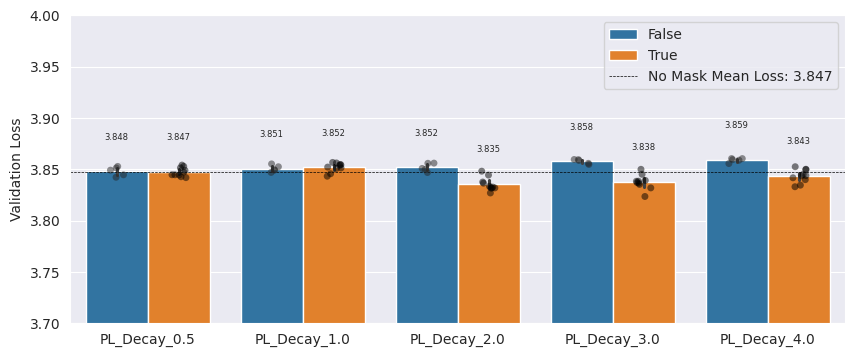

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=plot_df[plot_df["x_condition"] != "No_Mask_0.0"], x='x_condition', y='val_loss', hue='echoic_memory_flag', ax=ax, legend="full")
sns.stripplot(data=plot_df[plot_df["x_condition"] != "No_Mask_0.0"], x='x_condition', y='val_loss', hue='echoic_memory_flag', ax=ax, dodge=True, alpha=0.5, color='black', legend=False)
ax.axhline(plot_df[plot_df['x_condition'] == 'No_Mask_0.0']['val_loss'].mean(), color='black', linestyle='--', linewidth=0.5, label=f'No Mask Mean Loss: {plot_df[plot_df["x_condition"] == "No_Mask_0.0"]["val_loss"].mean():.3f}')
ax.set_ylim(3.7, 4)
ax.set_xlabel('')
ax.set_ylabel('Validation Loss')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()+0.02), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=6)

ax.legend()


In [11]:
plot_df.groupby(["x_condition", "echoic_memory_flag"]).agg({"val_loss": "mean"}).reset_index()


,x_condition,echoic_memory_flag,val_loss
0,No_Mask_0.0,False,3.847098
1,PL_Decay_0.5,False,3.848008
2,PL_Decay_0.5,True,3.847286
3,PL_Decay_1.0,False,3.850665
4,PL_Decay_1.0,True,3.851901
5,PL_Decay_2.0,False,3.851862
6,PL_Decay_2.0,True,3.835500
7,PL_Decay_3.0,False,3.857610
8,PL_Decay_3.0,True,3.837510
9,PL_Decay_4.0,False,3.858920


In [12]:
#filter for rows where n_layer = 6, n_head = 6, masking = True, mask_type = 'exponential_new', mask_decay_rate = 2,and then join with loss_df to get lowest 5 loss values for each echoic_memory value (1, 5, 10)

run_details_df[(run_details_df['n_layer'] == 6) & (run_details_df['n_head'] == 6) & (run_details_df['masking'] == True) & (run_details_df['mask_type'] == 'exponential_new') & (run_details_df['mask_decay_rate'] == 2)].merge(loss_df, on='run_id').sort_values(by='val_loss', ascending=True).groupby('echoic_memory')["seed"].apply(list)

echoic_memory
1     [616, 1337, 2347, 466, 42, 6747, 46674, 9, 111...
5     [2347, 1337, 616, 6747, 466, 9, 42, 46674, 111...
10    [2347, 42, 616, 1337, 466, 9, 6747, 46674, 869...
Name: seed, dtype: object

In [13]:
#PICKING TOP 5 SEEDS FOR ECHOIC MEMORY 10 to run multiseed models for other exp_new masks

run_details_df[(run_details_df['n_layer'] == 6) & (run_details_df['n_head'] == 6) & (run_details_df['masking'] == True) & (run_details_df['mask_type'] == 'exponential_new') & (run_details_df['mask_decay_rate'] == 2) & (run_details_df["echoic_memory"] == 10)].merge(loss_df, on='run_id').sort_values(by='val_loss', ascending=True).head(5)["seed"].tolist()

#S1 (42), S2(2347), S4(616), S8(466) 

[2347, 42, 616, 1337, 466]

In [17]:
#Plotting data for dataset 100M - "babylm_full_bpe_100M_8k", n_layer = 12, n_head = 12, mask_type = 'exponential_new' or 'Non'

plot_df_100M = run_details_df[(run_details_df['n_layer'] == 12) & (run_details_df['n_head'] == 12) & ((run_details_df['mask_type'] == 'exponential_new') | (run_details_df['mask_type'] == 'Non')) & (run_details_df['dataset'] == 'babylm_full_bpe_100M_8k') & (run_details_df['curriculum_learning'] == False)].merge(loss_df, on='run_id')[['mask_type', 'mask_decay_rate', 'echoic_memory', 'val_loss', 'seed']]

plot_df_100M["mask_type"] = plot_df_100M["mask_type"].apply(lambda x: "No_Mask" if x == "Non" else "PL_Decay")

plot_df_100M



,mask_type,mask_decay_rate,echoic_memory,val_loss,seed
0,No_Mask,0.0,1,3.634053,1337
1,PL_Decay,2.0,1,3.662614,1337


In [8]:
#Code Block to rename filenames 

import os
path = '/home/abishekthamma/PycharmProjects/masters_thesis/ss-llm/nanoGPT/config/babylm_full_bpe/8k_masking/echmem/MS'
exp_fol =  '' #['expk01', 'nomask', 'expk02', 'expk2000', 'curriculum', 'expkp05',  'expk03', 'expk04']
os.listdir(os.path.join(path, exp_fol))

em_fol_list = ['em01', 'em05', 'em10']

for em_fol in em_fol_list:
    list_fol = os.listdir(os.path.join(path, exp_fol, em_fol))
    for filename in list_fol:
        if "expk02" in filename:
            new_filename = filename.replace("expk02", exp_fol)
            os.rename(os.path.join(path, exp_fol, em_fol, filename), os.path.join(path, exp_fol, em_fol, new_filename))
            print(f"Renamed {filename} to {new_filename}")





FileNotFoundError: [Errno 2] No such file or directory: '/home/abishekthamma/PycharmProjects/masters_thesis/ss-llm/nanoGPT/config/babylm_full_bpe/8k_masking/echmem/MS/em01'

In [9]:
import os
path = '/home/abishekthamma/PycharmProjects/masters_thesis/ss-llm/nanoGPT/config/babylm_full_bpe/8k_masking/echmem/MS'
exp_fol =  '' #['expk01', 'nomask', 'expk02', 'expk2000', 'curriculum', 'expkp05',  'expk03', 'expk04']
os.listdir(os.path.join(path, exp_fol))

em_fol_list = ['em01', 'em05', 'em10']

for em_fol in em_fol_list:
    list_fol = os.listdir(os.path.join(path, exp_fol, em_fol))
    for filename in list_fol:
        #Open file and find value of wm_decay_rate and if it is 2, replace with 1
        # with open(os.path.join(path, exp_fol, em_fol, filename), 'r') as f:
        #     lines = f.readlines()
        #     for line in lines:
        #         if "wm_decay_rate" in line:
        #             print(f"{filename}: {line}")
        #             break
        
        with open(os.path.join(path, exp_fol, em_fol, filename), 'r') as f:
            lines = f.readlines()
            new_lines = []
            for line in lines:
                if "wm_decay_rate = 2" in line:
                    new_lines.append(line.replace("wm_decay_rate = 2", "wm_decay_rate = 0.5"))
                else:
                    new_lines.append(line)
            with open(os.path.join(path, exp_fol, em_fol, filename), 'w') as f:
                f.writelines(new_lines)
                print(f"Changed wm_decay_rate to 0.5 in {filename}")
        
                    

FileNotFoundError: [Errno 2] No such file or directory: '/home/abishekthamma/PycharmProjects/masters_thesis/ss-llm/nanoGPT/config/babylm_full_bpe/8k_masking/echmem/MS/em01'

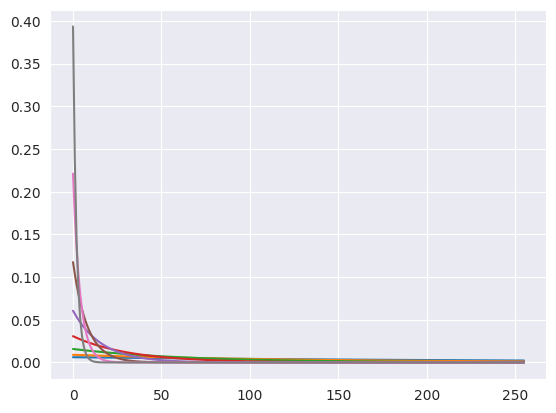

In [37]:
#plotting decay curves similar to how AliBi does it

#Alibi logic - Whatever the context length is, each token's q*k is subtracted by (n*1/2) and then multiplies is [0, -1, -2,... -(i-1)] where i is the context length. 

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import softmax

i = 256
n_head = 8

h_start_eq = 2**(-2**(-math.log2(n_head)+3))
m_heads = [h_start_eq**i for i in range(1, n_head+1)]
arr1 = list(range(0, -i, -1))

for m_head in m_heads[::-1]:
    arr2 = [m_head * x for x in arr1]
    plt.plot(softmax(arr2), label=f"Head {n_head}")



In [26]:
print(1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256)

0.5 0.25 0.125 0.0625 0.03125 0.015625 0.0078125 0.00390625
